In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import nltk

from nltk.tokenize import word_tokenize
import nltk.corpus

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import  LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.metrics import confusion_matrix, f1_score, classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn import svm


In [2]:
import pandas as pd
k=pd.read_excel("fake_news_dataset.xlsx")

In [3]:
k.head(10)


,Actual_Post,Posted_date,No_of_like,No_of_follower,Page_created_on,is_verified,label
0,"ኢዜማ "" ለነፍጠኞችና ለ Bilxiginnaa ተላላኪዎች እቺን ሚስጥር ጀ...",2020-02-12,15824,16202,2019-02-18,No,Fake
1,"ኦሮሞነትን ትተህ ኢትዮጵያዊ ሁን ለምትሉት! ""ኦሮሞነትን ትተህ ኢትዮጵያዊ...",2020-02-12,15824,16202,2019-02-18,No,Fake
2,"#ባልደራሱ ********* "" ነፍጠኞች ውጭ ሀገር ሲኖሩም ከ #መንጃፍ...",2020-02-12,15824,16202,2019-02-18,No,Fake
3,ደብተራዎች ስሙ ጉዳችሁን ዘረኞች ጎጠኞች ነፍጠኞች ጅሎች እና ቆማጦች አማ...,2020-02-13,15824,16202,2019-02-18,No,Fake
4,"የ Taye Dendea Aredo እስክሪብቶ እኔጋ ደርሷል። "" እና በቅርብ...",2020-02-13,15824,16202,2019-02-18,No,Fake
5,"የነፍጠኞች ድራማ ቀጠለ """"""""""""""""""""""""""""""""""""""""""""""""""""""""""""""...",2020-02-13,15824,16202,2019-02-18,No,Fake
6,የጀዋር ዜግነት ጉዳይ አሁን ባለው ሁኔታ ክርክሩ ጀዋር #አሜሪካዊ ነው ወ...,2020-02-13,15824,16202,2019-02-18,No,Fake
7,ከቡና ቤት ተገኙ ታግተዋል የተባሉት የብናቤት ሸቃዮች የሽቀላው ኮንትራት...,2020-02-13,15824,16202,2019-02-18,No,Fake
8,"#Bilxiginnaa.ፓርቲ ባለ ሀብቶችንና የመንግስት ተቋማትን ""የገንዘብ...",2020-02-13,15824,16202,2019-02-18,No,Fake
9,ጠቅላይ ሚኒስትር ዐቢይ ከመካከለኛው ምስራቅ ሀገራት ከተውጣጡ የኢትዮጵ...,2020-02-13,264013,284338,2014-08-14,Yes,Real


In [4]:
import nltk
import re

In [5]:
space_pattern = '\s+'
url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|''[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
englishword_num ='[a-zA-Z]|[0-9]+'
AmhPunc='[፤።፡፣:,.?/()•“”*፨]+'
special_char = "[፥@#$%^&=?×!,;:_.(){}`'+*<>\"¤—„\® ̄™¡¡\x10»€«·‘0e1b§”¬¦...""f÷\~ ̈©±¥£¶–°• ̃’“|]"
geez_number='[፩፪፫፬፭፮፯፰፱፲፳፴፵፶፷፸፹፺፻] ' # for removing geez number
RE_EMOJI = re.compile('[\U00010000-\U0010ffff]', flags=re.UNICODE)
emoji_pattern = re.compile("["u"\U0001F600-\U0001F64F"  # emoticons
                                 u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                 u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                 u"\U0001F1E0-\U0001F1FF"  # flags 
                                 u"\U00002702-\U000027B0"
                                 u"\U000024C2-\U0001F251"
                                 "]+", flags=re.UNICODE)
haa='[ሃ]'; he='[ሐ]'; hu='[ሑ]'; hi='[ሒ]'; ha='[ሓ]'; hie='[ሔ]'; h='[ሕ]'; ho='[ሖ]'; he1='[ኀ]'; hu1='[ኁ]'; hi1='[ኂ]'; ha1='[ኃ]'; hie1='[ኄ]'; h1='[ኅ]'; ho1='[ኆ]';
se='[ሠ]'; su='[ሡ]'; si='[ሢ]'; sa='[ሣ]'; sie='[ሤ]'; s='[ሥ]'; so='[ሦ]'; 
aa1='[ኣ]'; ae='[ዐ]'; au='[ዑ]'; ai='[ዒ]'; aa='[ዓ]'; aie='[ዔ]'; e='[ዕ]'; ao='[ዖ]';
tse='[ጸ]'; tsu='[ጹ]'; tsi='[ጺ]'; tsa='[ጻ]'; tsie='[ጼ]'; ts='[ጽ]'; tso='[ጾ]';

In [6]:
import nltk
corpus=[]
for i in range(0,len(k)):
    Clean_text = re.sub(url_regex,'', str(k['Actual_Post'][i]))
    Clean_text = re.sub(AmhPunc,' ',Clean_text)
    Clean_text=re.sub(special_char,' ',Clean_text)
    Clean_text= re.sub(englishword_num,'',Clean_text)
    Clean_text= re.sub(r'(.)\1+', r'\1\1',Clean_text) #removingelongation in text
    Clean_text = RE_EMOJI.sub(r'', Clean_text)
    Clean_text =re.sub(geez_number,'',Clean_text)
    Clean_text=re.sub('-','',Clean_text)
    Clean_text=re.sub(r'<[^>]*>','', Clean_text)
    Clean_text = Clean_text.replace("\\", "");
    Clean_text = Clean_text.replace("[", "");
    Clean_text = Clean_text.replace("]", "");
    Clean_text = emoji_pattern.sub(r'', Clean_text)
    Clean_text = re.sub(space_pattern,' ',Clean_text)
    ##################################################
    Clean_text= re.sub(he,'ሀ',Clean_text); 
    Clean_text= re.sub(hu,'ሁ',Clean_text);
    Clean_text= re.sub(hi,'ሂ',Clean_text);
    Clean_text= re.sub(ha,'ሀ',Clean_text); 
    Clean_text= re.sub(hie,'ሄ',Clean_text);
    Clean_text= re.sub(h,'ህ',Clean_text);
    Clean_text= re.sub(ho,'ሆ',Clean_text);
    Clean_text= re.sub(haa,'ሀ',Clean_text);
    #######################################################
    Clean_text= re.sub(he1,'ሀ',Clean_text) 
    Clean_text= re.sub(hu1,'ሁ',Clean_text) 
    Clean_text= re.sub(hi1,'ሂ',Clean_text)
    Clean_text= re.sub(ha1,'ሀ',Clean_text)
    Clean_text= re.sub(hie1,'ሄ',Clean_text)
    Clean_text= re.sub(h1,'ህ',Clean_text)
    Clean_text= re.sub(ho1,'ሆ',Clean_text)
    ##########################################################
    Clean_text= re.sub(se,'ሰ',Clean_text) 
    Clean_text= re.sub(su,'ሱ',Clean_text)
    Clean_text= re.sub(si,'ሲ',Clean_text)
    Clean_text= re.sub(sa,'ሳ',Clean_text)
    Clean_text= re.sub(sie,'ሴ',Clean_text) 
    Clean_text= re.sub(s,'ስ', Clean_text)
    Clean_text= re.sub(so,'ሶ',Clean_text)
    ###################################################
    Clean_text= re.sub(ae,'አ',Clean_text) 
    Clean_text= re.sub(au,'ኡ',Clean_text)
    Clean_text= re.sub(ai,'ኢ',Clean_text)
    Clean_text= re.sub(aa,'አ',Clean_text) 
    Clean_text= re.sub(aie,'ኤ',Clean_text)
    Clean_text= re.sub(e,'እ',Clean_text)
    Clean_text= re.sub(ao,'ኦ',Clean_text)
    Clean_text= re.sub(aa1,'አ',Clean_text)
    #############################################
    Clean_text= re.sub(tse,'ፀ',Clean_text) 
    Clean_text= re.sub(tsu,'ፁ',Clean_text) 
    Clean_text= re.sub(tsi,'ፂ',Clean_text)
    Clean_text= re.sub(tsa,'ፃ',Clean_text) 
    Clean_text= re.sub(tsie,'ፄ',Clean_text)
    Clean_text= re.sub(ts,'ፅ',Clean_text)
    Clean_text= re.sub(tso,'ፆ',Clean_text)
    Clean_text= Clean_text.split()
    Clean_text = ' '.join(Clean_text)
    corpus.append(Clean_text)
    

In [7]:
tokens=[]


from nltk.tokenize import word_tokenize


tokenized_sents = [word_tokenize(i) for i in corpus]
for i in tokenized_sents:
    #print(i)
    tokens.append(i)
    
tokens=[[word for word in article if len(word)>1]for article in tokens]

In [8]:
from collections import Counter
#word_count=Counter(tokens)
word_count= Counter(item for items in tokens for item in items)
top=word_count.most_common(50)
top



[('ነው', 6010),
 ('ላይ', 4777),
 ('እና', 3936),
 ('ሰዎች', 2277),
 ('ወደ', 1858),
 ('አቶ', 1746),
 ('ጋር', 1744),
 ('ውስጥ', 1674),
 ('ሺህ', 1468),
 ('ቤት', 1419),
 ('አበባ', 1370),
 ('ህዝብ', 1349),
 ('መንግስት', 1278),
 ('መሆኑን', 1246),
 ('ክልል', 1180),
 ('ብለዋል', 1077),
 ('በላይ', 1022),
 ('አዲስ', 1018),
 ('ጊዜ', 990),
 ('ሲሆን', 969),
 ('ስራ', 968),
 ('ደግሞ', 955),
 ('አመት', 935),
 ('ሚኒስትር', 929),
 ('ግን', 920),
 ('ነበር', 919),
 ('ጠቅላይ', 894),
 ('ገልፀዋል', 861),
 ('የኢትዮጵያ', 858),
 ('ተናግረዋል', 824),
 ('ከተማ', 804),
 ('አሁን', 787),
 ('ከፍተኛ', 784),
 ('ብቻ', 755),
 ('ቁጥር', 754),
 ('ዛሬ', 752),
 ('በኢትዮጵያ', 748),
 ('ቫይረስ', 742),
 ('ያለው', 729),
 ('እንዲሁም', 721),
 ('አህመድ', 715),
 ('ኢትዮጵያ', 711),
 ('አንድ', 689),
 ('ድጋፍ', 688),
 ('አብይ', 652),
 ('እንደ', 648),
 ('ቀን', 642),
 ('ናቸው', 638),
 ('ነሀሴ', 632),
 ('ነገር', 629)]

In [9]:
import re
stopword=[]
with open('stopworrrrd.txt','r' ,encoding='utf8') as f:
    f.readline()
    for i in f:
       
        stopword.append(re.sub('[\n]+', '',str(i)))

In [10]:
after_stopword_remove=[]
after_stopword_remove=[[word for word in article if word not in stopword]for article in tokens]
after_stopword_remove

[['ኢዜማ',
  'ለነፍጠኞችና',
  'ተላላኪዎች',
  'እቺን',
  'ሚስጥር',
  'ጀባ',
  'እንበላችሁ',
  'እስቲ',
  'ጀዋር',
  'የዜግነት',
  'ጉዳይ',
  'የምት',
  'ጨነቁ',
  'ኦሮሞ',
  'ሁሉ',
  'የምትቀኑት',
  'አጀንዳ',
  'ለመፍጠር',
  'የምትሯሯጡ',
  'የመንግስት',
  'ካድሬዎችና',
  'የነፍጠኛ',
  'አሽቃባጮች',
  'ሁሉ',
  'በደንብ',
  'ጠይቁት',
  'የሁለት',
  'ሀገር',
  'ዜጋ',
  'የኤርትራ',
  'የአሜሪካ',
  'ምንም',
  'ጥያቄ',
  'የአብይ',
  'ተላላኪ',
  'ሆኗል',
  'እንዴት',
  'ጥያቄ',
  'ለሱ',
  'አቅርቡለት',
  'እሺ'],
 ['ኦሮሞነትን',
  'ትተህ',
  'ኢትዮጵያዊ',
  'ሁን',
  'ለምትሉት',
  'ኦሮሞነትን',
  'ትተህ',
  'ኢትዮጵያዊ',
  'ሁን',
  'ከተባልኩኝ',
  'ኦሮሞነትን',
  'እመርጣለው',
  'ኦሮሞ',
  'ሆኜ',
  'ኢትዮጵያዊ',
  'የምሆነው',
  'እኔን',
  'ምሰል',
  'የሚባለው',
  'አልሰማም',
  'እኔን',
  'ምሰል',
  'የሚለው',
  'የሚያጠፋን',
  'ኦሮሞ',
  'ኦሮሞነቱን',
  'ያዘ',
  'ጉራጌው',
  'ማንነቱን',
  'እንደያዘ',
  'ሱማሌው',
  'ሶማሌነቱን',
  'ያዘ',
  'ሌላውም',
  'እንደዛው',
  'ማንነቱን',
  'ኢትዮጵያዊ',
  'ይችላል',
  'እኔን',
  'ሁን',
  'በሽታ',
  'ኢትዮጵያ',
  'ራሱ',
  'ጉራማይሌ',
  'ስትሆን',
  'ታምራለች',
  'ሌንጮ',
  'ለታ',
  'አማረኛ',
  'ተናጋሪው',
  'ኦሮሞ',
  'ያለበት',
  'አከባቢ',
  'ለመኖር',
  'ሄድ',
  'ኦሮመኛ',
  'ከመልመድ',
  'ይልቅ',
  'ኦ

In [ ]:
#kk=0
#for j in after_stopword_remove:
    #with open('C:/Users/MenbiAmel/Music/fake news detection/file/'+str(kk)+'.txt','w', encoding='utf8') as f:
        #for listitem in j:
            #f.write('%s\n' % listitem)
   # kk+=1

In [ ]:
import string,l3
#stopwordsl=mymodule.importing_files_for_stopwords()
for i in range(0,4589):
    document='C:/Users/MenbiAmel/Music/fake news detection/file/'+str(i)+'.txt'
    l3.anal_file('am', document,'C:/Users/MenbiAmel/Music/fake news detection/Post_Stemmed/'+str(i)+'.csv', root=False, gram=False,nbest=1)





#   እንዲሁም  
for i in range(0,4589):
    unstemmed_word=open('C:/Users/MenbiAmel/Music/fake news detection/file/'+str(i)+'.txt','r',encoding="utf8")
    unstemmed_wordm=unstemmed_word.read()
    unstemmed_wordarray=[]
    unstemmed_wordmarray=unstemmed_wordm
    unstemmed_wordmtostrng="".join(unstemmed_wordmarray)
    unstemmed_wordm_final=unstemmed_wordmtostrng.split()
    unstemmed_wordm_final2=[]
    for ss in unstemmed_wordm_final:
        table = str.maketrans('', '', string.punctuation)
        ss = [w.translate(table) for w in ss]
        ss="".join(ss)
        unstemmed_wordm_final2.append(ss)

    df=pd.read_csv('C:/Users/MenbiAmel/Music/fake news detection/Post_Stemmed/'+str(i)+'.csv',sep=";",names=['word:'])
    final_stemmed_val=[]
    for k in range(0,len(df)):
        x=df.iloc[k,0]  
        final_stemmed_val.append(x)
    
    words_to_stemm=[]
    for xx in unstemmed_wordm_final2:
        adding_word_suffix='word: '+xx
        words_to_stemm.append(adding_word_suffix)
    ff=[]
    for yy in range(0,len(final_stemmed_val)):
        if final_stemmed_val[yy] not in words_to_stemm:
            ff.append(final_stemmed_val[yy])
    
    jj=[]
    for mm in range(0,len(ff)):
        table = str.maketrans('', '', string.punctuation)
        term_to_stem = [w.translate(table) for w in ff[mm]]
        term_to_stem="".join(term_to_stem)
       # term_to_stem= term_to_stem.split()
        if term_to_stem=="":
            continue
        elif len(term_to_stem)<2:
            continue
        else:
            jj.append(term_to_stem)
    mmm=" ".join(jj)
    mid_file = open('C:/Users/MenbiAmel/Music/fake news detection/Stemmed_puncR/'+str(i)+'.txt', "w",encoding="utf8")
    mid_file.write((mmm))
    mid_file.close()

In [11]:
stemed_file=[]

for i in range(0,4590):
    unstemmed_word=open('C:/Users/MenbiAmel/Music/fake news detection/Stemmed_puncR/'+str(i)+'.txt','r',encoding="utf8")
    unstemmed_wordm=unstemmed_word.read()
    unstemmed_wordarray=[]
    unstemmed_wordmarray=unstemmed_wordm
    stemed_file.append(unstemmed_wordmarray)

In [12]:
stem=[]


from nltk.tokenize import word_tokenize


stemed_sents = [word_tokenize(j) for j in stemed_file]
for j in stemed_sents:
    #print(i)
    stem.append(j)
    
stem=[[word for word in article if len(word)>2]for article in stem]

In [ ]:
from nltk.tokenize import word_tokenize
def tokenizer_text(file):
    stem=[]
    stemed_sents = [word_tokenize(j) for j in file]
    for j in stemed_sents:
        stem.append(j)
    stem=[[word for word in article if len(word)>2]for article in stem]
    return stem
    
stem=tokenizer_text(stemed_file)
stem
    

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
tfidfv=TfidfVectorizer(ngram_range=(1,1),use_idf=True, smooth_idf=True)
x=tfidfv.fit_transform(stemed_file).toarray()


In [14]:
x.shape

(4590, 21328)

In [15]:
y=k['label']

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
tfidfv.get_feature_names()

['ሀለ',
 'ሀለቃ',
 'ሀለንጋይ',
 'ሀለወ',
 'ሀለፊ',
 'ሀሊ',
 'ሀሊማ',
 'ሀሊፍ',
 'ሀላ',
 'ሀላል',
 'ሀላም',
 'ሀላቀርነት',
 'ሀላባ',
 'ሀላባነት',
 'ሀላኛ',
 'ሀላይነት',
 'ሀላፈነታቸ',
 'ሀላፊ',
 'ሀላፊነቱነ',
 'ሀላፊነቱን',
 'ሀላፊነት',
 'ሀላፊዎች',
 'ሀላፍነት',
 'ሀል',
 'ሀልቲ',
 'ሀሎ',
 'ሀመደኒል',
 'ሀመድ',
 'ሀሙስ',
 'ሀማሴን',
 'ሀማሴክ',
 'ሀማስ',
 'ሀማድ',
 'ሀሜተኛ',
 'ሀሜት',
 'ሀምለ',
 'ሀምሊ',
 'ሀምሌ',
 'ሀምሳ',
 'ሀምቢሳ',
 'ሀምተን',
 'ሀምዛ',
 'ሀምደኒል',
 'ሀምዳ',
 'ሀምዶክ',
 'ሀምፕል',
 'ሀረማያ',
 'ሀረሪ',
 'ሀረር',
 'ሀረርጌ',
 'ሀረዋጫ',
 'ሀረግ',
 'ሀሪ',
 'ሀሪሪ',
 'ሀሪሰ',
 'ሀሪስ',
 'ሀራ',
 'ሀራት',
 'ሀር',
 'ሀርቫርድ',
 'ሀርነት',
 'ሀርክዋት',
 'ሀርዌል',
 'ሀርዴ',
 'ሀሮማያ',
 'ሀሰ',
 'ሀሰብ',
 'ሀሰተኛ',
 'ሀሰት',
 'ሀሰን',
 'ሀሳባች',
 'ሀሳብ',
 'ሀሳብና',
 'ሀሳተኛ',
 'ሀሳዊ',
 'ሀሴት',
 'ሀስቦ',
 'ሀሶት',
 'ሀሸ',
 'ሀሺ',
 'ሀቀኛ',
 'ሀቀኝነት',
 'ሀቂ',
 'ሀቃ',
 'ሀቅ',
 'ሀበሬታ',
 'ሀበሻ',
 'ሀበታዊ',
 'ሀቢረ',
 'ሀቢብ',
 'ሀቢታት',
 'ሀባብ',
 'ሀብል',
 'ሀብረተሰብ',
 'ሀብረት',
 'ሀብተማርያም',
 'ሀብተአብ',
 'ሀብተወልድ',
 'ሀብታም',
 'ሀብታዊ',
 'ሀብት',
 'ሀቦ',
 'ሀቫ',
 'ሀነዋለ',
 'ሀኒ',
 'ሀና',
 'ሀኔታ',
 'ሀንቲ',
 'ሀንቲይ',
 'ሀንክ',
 'ሀንክስ',
 'ሀንዋል',
 'ሀንድ',
 'ሀንጋሪ',
 'ሀንፍር',
 'ሀኪም',
 'ሀካ',
 'ሀካኪ',


In [18]:
tfidfv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [19]:
pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,21318,21319,21320,21321,21322,21323,21324,21325,21326,21327
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [20]:
y_test.shape,X_test.shape,X_train.shape,y_train.shape

((918,), (918, 21328), (3672, 21328), (3672,))

In [ ]:
#count.head()

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

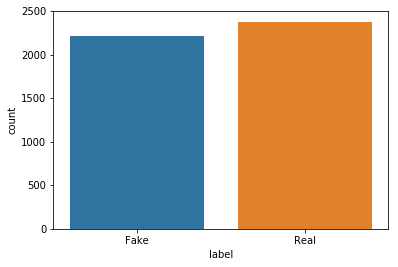

In [22]:
sns.countplot(k['label'])

In [23]:
from sklearn import metrics
import numpy as np
import itertools

In [24]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy of LogisticRegression  classifier on training set: 1.00
Accuracy of LogisticRegression classifier on test set: 0.61
accuracy:   0.612
Confusion matrix, without normalization


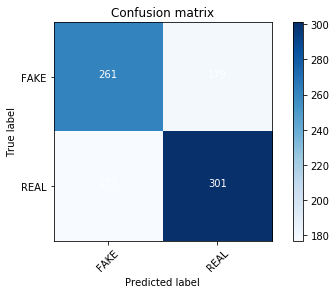

In [25]:
from sklearn.linear_model import  LogisticRegression
logreg=LogisticRegression(C=1e5, max_iter=10000)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of LogisticRegression  classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of LogisticRegression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

In [ ]:
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
cvscore1=cross_val_score(logreg,x,np.ravel(y),cv=5)
y_pred=cross_val_predict(logreg,x,np.ravel(y),cv=5)
cvscore1,cvscore1.mean()

In [ ]:
print('Accuracy of LogisticRegression with cv:'+str(cvscore1.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

In [ ]:
totacu=round((metrics.accuracy_score(y,y_pred)*100),3)
totacu

In [ ]:
totMisacu=round((1-metrics.accuracy_score(y,y_pred))*100,3)
totMisacu

In [ ]:
recall_Real=round((metrics.recall_score(y,y_pred,pos_label='Real'))*100,3)
recall_Real

In [ ]:
recall_Fake=round((metrics.recall_score(y,y_pred,pos_label='Fake'))*100,3)
recall_Fake

In [ ]:
precision_real=round((metrics.precision_score(y,y_pred,pos_label='Real'))*100,3);
precision_real

In [ ]:
precision_Fake=round((metrics.precision_score(y,y_pred,pos_label='Fake'))*100,3);
precision_Fake

In [ ]:
f1_score_Real=round(2*((recall_Real*precision_real)/(recall_Real+precision_real)),3)
f1_score_Real

In [ ]:
f1_score_Fake=round(2*((recall_Fake*precision_Fake)/(recall_Fake+precision_Fake)),3)
f1_score_Fake

In [ ]:
from sklearn.svm import LinearSVC
svmmodel_w2v= LinearSVC(C=0.01, multi_class='ovr', max_iter=10000, 
                        class_weight='balanced',penalty='l2' )
svmmodel_w2v=svmmodel_w2v.fit(X_train, y_train)
pred = svmmodel_w2v.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of support vector machine   classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of support vector machine classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
cvscore2=cross_val_score(svmmodel_w2v,x,np.ravel(y),cv=5)
y_pred=cross_val_predict(svmmodel_w2v,x,np.ravel(y),cv=5)

In [ ]:
cvscore2,cvscore2.mean()

In [ ]:
print('Accuracy of support vector machine cv:'+str(cvscore2.mean()))
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
print(classification_report(y, y_pred))

In [ ]:
totacu=round((metrics.accuracy_score(y,y_pred)*100),3)
totacu

In [ ]:
totMisacu=round((1-metrics.accuracy_score(y,y_pred))*100,3)
totMisacu

In [ ]:
recall_Real=round((metrics.recall_score(y,y_pred,pos_label='Real'))*100,3)
recall_Real

In [ ]:
recall_Fake=round((metrics.recall_score(y,y_pred,pos_label='Fake'))*100,3)
recall_Fake

In [ ]:
precision_real=round((metrics.precision_score(y,y_pred,pos_label='Real'))*100,3);
precision_real

In [ ]:
precision_Fake=round((metrics.precision_score(y,y_pred,pos_label='Fake'))*100,3);
precision_Fake

In [ ]:
f1_score_Real=round(2*((recall_Real*precision_real)/(recall_Real+precision_real)),3)
f1_score_Real

In [ ]:
f1_score_Fake=round(2*((recall_Fake*precision_Fake)/(recall_Fake+precision_Fake)),3)
f1_score_Fake

Accuracy of RandomForest  classifier on training set: 1.00
Accuracy of RandomForest classifier on test set: 0.69
accuracy:   0.691
Confusion matrix, without normalization


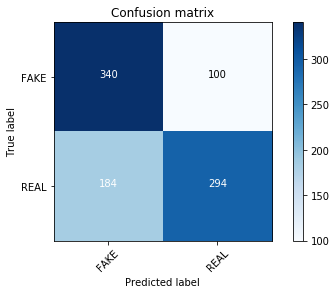

In [26]:
from sklearn.ensemble import RandomForestClassifier
Random=RandomForestClassifier(n_estimators=400, n_jobs=4)
Random.fit(X_train, y_train)
pred = Random.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print('Accuracy of RandomForest  classifier on training set: {:.2f}'
     .format(Random.score(X_train, y_train)))
print('Accuracy of RandomForest classifier on test set: {:.2f}'
     .format(Random.score(X_test, y_test)))
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
print(classification_report(y_test, pred))

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Random=RandomForestClassifier(n_estimators=400, n_jobs=4)
from sklearn.model_selection import cross_val_score,cross_val_predict,cross_validate
cvscore3=cross_val_score(Random,x,np.ravel(y),cv=5)
y_pred=cross_val_predict(Random,x,np.ravel(y),cv=5)

In [ ]:
cvscore3,cvscore3.mean()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

In [ ]:
totacu=round((metrics.accuracy_score(y,y_pred)*100),3)
totacu

In [ ]:
totMisacu=round((1-metrics.accuracy_score(y,y_pred))*100,3)
totMisacu

In [ ]:
recall_Real=round((metrics.recall_score(y,y_pred,pos_label='Real'))*100,3)
recall_Real

In [ ]:
recall_Fake=round((metrics.recall_score(y,y_pred,pos_label='Fake'))*100,3)
recall_Fake

In [ ]:
precision_real=round((metrics.precision_score(y,y_pred,pos_label='Real'))*100,3);
precision_real

In [ ]:
precision_Fake=round((metrics.precision_score(y,y_pred,pos_label='Fake'))*100,3);
precision_Fake

In [ ]:
f1_score_Real=round(2*((recall_Real*precision_real)/(recall_Real+precision_real)),3)
f1_score_Real

In [ ]:
f1_score_Fake=round(2*((recall_Fake*precision_Fake)/(recall_Fake+precision_Fake)),3)
f1_score_Fake

In [ ]:
cm = metrics.confusion_matrix(y, y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])